In [1]:
import gc
import torch
from src.utils.commons import get_config, get_device, set_seed
# from src.model.gae import GAE
from src.data.loader_paper import GraphDatasetPaper as GraphDataset
from warnings import filterwarnings
from torch_geometric.loader import DataLoader
from src.training.train import train

filterwarnings('ignore')
torch.cuda.empty_cache()
gc.collect()

config = get_config('configs/NACA0012.yaml')
set_seed(config['config']['seed'])

device = get_device()
train_dataset = GraphDataset(split = 'train', config=config['config'])
# model = GAE(config=config).to(device)

# train_loader = DataLoader(dataset=train_dataset, 
#                           batch_size=config['training']['batch_size'], 
#                           shuffle=False,
#                           num_workers=config['training']['num_workers'])

# train_history = train(model=model, 
#                       device=device,
#                       train_loader=train_loader,
#                       is_tqdm=False,
#                       single_batch=config['training']['single_batch_run'],
#                       save_best_model=config['training']['save_best_model'],
#                       config=config['training'])

Warning: meshio does not support tags of string type.
    Surface tag  airfoil will be replaced by 1

Warning: meshio does not support tags of string type.
    Surface tag  farfield will be replaced by 2

IndexError: list index out of range

In [4]:
import torch.nn.functional as F
train_dataset = GraphDataset(split = 'train')
model.eval()
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=config['training']['batch_size'], 
                          shuffle=False,
                          num_workers=config['training']['num_workers'])
data = next(iter(train_loader))
target = data.x
predicted, _ = model(data)  # Your model output

In [5]:
loss = F.mse_loss(predicted, target)
print(f"Re-evaluation loss: {loss.item()}")

Re-evaluation loss: 0.5730345845222473


In [4]:
from src.utils.commons import save_model
save_model(model, f'artifacts/{config["config"]["name"]}.pth')


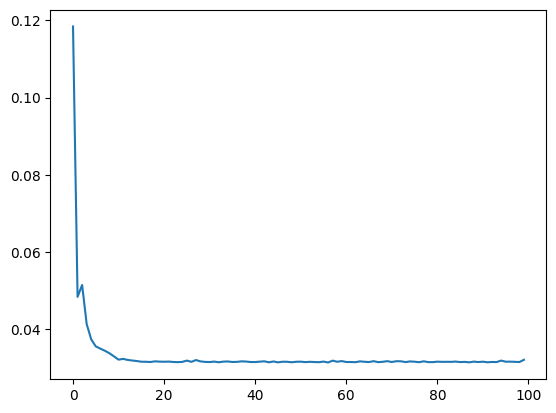

In [5]:
import matplotlib.pyplot as plt

plt.plot(train_history['train_loss'])
plt.plot(train_history['val_loss'])

In [ ]:
from src.utils.commons import load_model, set_seed, get_device
from src.data.loader import GraphDataset
from torch_geometric.loader import DataLoader
import torch.nn.functional as F

set_seed(42)
device = get_device()
train_dataset = GraphDataset(split = 'train')
model = load_model('artifacts/GAT_100_pool.pth')
model.to(device)
model.eval()
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=config['training']['batch_size'], 
                          shuffle=False,
                          num_workers=config['training']['num_workers'])

batch = next(iter(train_loader)).to(device)
target = batch.x
out, _ = model(batch)
loss = F.mse_loss(out, target)
print(f"Re-evaluation loss: {loss.item()}")

Re-evaluation loss: 0.5067916512489319


In [1]:
from src.utils.commons import load_model, get_config, set_seed
from src.data.loader import GraphDataset
from torch_geometric.loader import DataLoader

config = get_config('configs/default.yaml')
set_seed(config['config']['seed'])

train_dataset = GraphDataset(split = 'train')
model = load_model(save_path = f'artifacts/GAT_100_pool.pth')
model.eval()
data = train_dataset[0]
target = data.x
predicted, _ = model(data)  # Your model output

In [12]:
import torch
print(f"Mean: {torch.mean(target[:,0])}")
print(f"Std: {torch.std(target[:,0])}")
print(f"Max: {torch.max(target[:,0])}")
print(f"Min: {torch.min(target[:,0])}")


Mean: 4.946764109448054e-10
Std: 1.000016212463379
Max: 1.93668794631958
Min: -5.757261753082275


In [13]:
predicted

tensor([[ 2.3000, -0.6171],
        [ 0.6963, -0.6171],
        [ 1.2671, -0.6171],
        ...,
        [-1.3286, -0.6171],
        [-0.2173, -0.6171],
        [-0.7265, -0.4834]], grad_fn=<NativeBatchNormBackward0>)

In [14]:
target

tensor([[ 1.6893, -0.3061],
        [ 0.6079, -0.5585],
        [ 0.8825, -0.5192],
        ...,
        [-0.7824, -0.8180],
        [-0.0327, -0.1216],
        [-0.0343, -0.0886]])

In [2]:
import torch.nn.functional as F
print(F.mse_loss(predicted[:,0], target[:,0]).detach().cpu().numpy())
# print(F.rmse_loss(predicted[:,0], target[:,0]).detach().cpu().numpy())
print(F.l1_loss(predicted[:,0], target[:,0]).detach().cpu().numpy())
print(F.smooth_l1_loss(predicted[:,0], target[:,0]).detach().cpu().numpy())
print(F.huber_loss(predicted[:,0], target[:,0]).detach().cpu().numpy())
print(F.smooth_l1_loss(predicted[:,0], target[:,0]).detach().cpu().numpy())
print(F.l1_loss(predicted[:,0], target[:,0]).detach().cpu().numpy())

0.62439245
0.50935614
0.235132
0.235132
0.235132
0.50935614


In [ ]:
from src.utils.plot import Plot

# Create plotter
plotter = Plot(save_dir='output/')

# After getting model output
plotter.plot_velocity_field(predicted_batch, title="Model Prediction", save=False)

In [ ]:
import matplotlib.pyplot as plt

train_dataset.mesh.points[:,:2]
plt.scatter(train_dataset.mesh.points[:,0], 
            train_dataset.mesh.points[:,1])
# make the aspect ratio 8:4
plt.gca().set_aspect('equal', 'box')
plt.show()


In [ ]:
batch = train_dataset[3]
plt.scatter(batch.pos[:, 0].detach().cpu().numpy(), 
            batch.pos[:, 1].detach().cpu().numpy(), 
            c=batch.x[:, 0].detach().cpu().numpy(), 
            cmap='viridis',
            s=0.05)
plt.gca().set_aspect('equal', 'box')
plt.show()